In [3]:
%matplotlib inline

<br>
<br>

# Matplotlib Tips and Tricks

# Sections

- [When to use the figure object](#When-to-use-the-figure-object)
- [Fitting the margins](#fitting-the-margins)

<br>
<br>

<br>
<br>

<br>
<br>

# When to use the figure object

[[back to top](#Sections)]

Often, we see code that explicitely instantiates a new `figure` object:

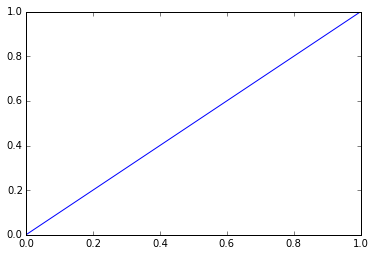

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot([0, 1], [0, 1])
plt.show()

If we are not planning to manipulate the figure object or add subplots to the figure, this may be redundant. Why? 
As nicely explained on [SO](http://stackoverflow.com/questions/31729220/when-is-matplotlibs-pyplot-figure-redundant/31730499#31730499), the `plot` function retrieves the current figure automatically via `gcf` ("get current figure") nested inside a `gca` ("get current axes") call. Thus, it really doesn't matter if we create a figure prior to `plot` unless we are planning to modify it in some way.

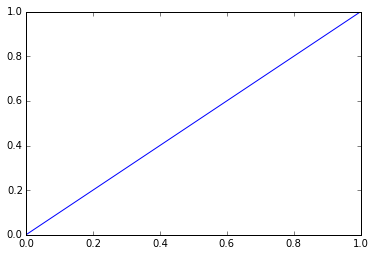

In [6]:
import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1])
plt.show()

<br>
<br>

# Fitting the margins

[[back to top](#Sections)]

Although a plot appears perfectly fine inline in a IPython notebook, sometimes we may notice that certain figure elements went missing if we save it to an image file via `savefig`. The `tight_layout()` function often helps to produce a "tighter" appearence of the plot, it is not sufficient if to fit our graph nicely into the figure boundaries if we plot outside it's margins. Consider the following example:

![](../images/tricks/bbox.png)

Typically, this issue can be easily resolved by setting the `bbox_inches` attribute to `'tight'` inside `savefig`. You can find the complete code example for producing the plot below:

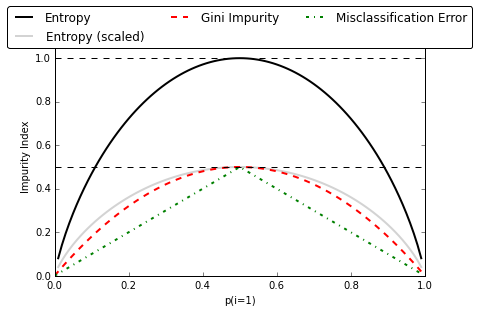

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]


fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                  ['Entropy', 'Entropy (scaled)', 
                    'Gini Impurity', 'Misclassification Error'],
                  ['-', '-', '--', '-.'],
                  ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)



ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()

# uncomment the following line to save the image to disk
# plt.savefig('./impurity.png', dpi=300, bbox_inches='tight')
plt.show()